# Coletando estatísticas dos jogadores por temporada regular da NBA

### O objetivo 
* O objetivo dessa pesquisa é fazer uma comparação entre as distribuições dos pontos ( cesta de quadra, cesta de 3 e lances livres );
* No qual vai ser feito testes estatisticos para saber se exite uma diferença significativa entre os tipos de pontos.

### A metodologia utilizada é descrita abaixo:

1. Entraremos no linke da nba <https://www.nba.com/stats/players/traditional/?sort=PTS&dir=-1>;
2. Encontraremos a api das estatísticas dos jogadores e importaremos através do módulo [requests](https://docs.python-requests.org/en/latest/);
3. Alocaremos em um data frame através do módulo [pandas](https://pandas.pydata.org/docs/) e [numpy](https://numpy.org/doc/);
4. Faremos uma breve visualização dos dados com o módulo [seaborn](https://seaborn.pydata.org/) e [matplolib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html);
5. E por fim, faremos os testes de hipóteses com o módulo [scipy](https://scipy.github.io/devdocs/index.html).

###### OBS: '' Caso dê erro no requests.get  é devido a atualização do site da NBA no qual muda as localizações da api do site, mas não se preocupe com isso! Vou estar sempre atualizando esse script. ''

In [76]:
# Importando os módulos
import numpy as np
import pandas as pd
import requests
import seaborn as sb
import matplotlib.pyplot as plt

#### Passo 1 - Importando a api do site e alocando as estatísticas em um data frame

In [2]:
# Importando a api das estatísticas da tabela do site
headers = {
    'Connection': 'keep-alive',
    'sec-ch-ua': '" Not;A Brand";v="99", "Google Chrome";v="97", "Chromium";v="97"',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'sec-ch-ua-mobile': '?1',
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Mobile Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'sec-ch-ua-platform': '"Android"',
    'Origin': 'https://www.nba.com',
    'Sec-Fetch-Site': 'same-site',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Dest': 'empty',
    'Referer': 'https://www.nba.com/',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'If-Modified-Since': 'Mon, 17 Jan 2022 17:50:13 GMT',
}

params = (
    ('College', ''),
    ('Conference', ''),
    ('Country', ''),
    ('DateFrom', ''),
    ('DateTo', ''),
    ('Division', ''),
    ('DraftPick', ''),
    ('DraftYear', ''),
    ('GameScope', ''),
    ('GameSegment', ''),
    ('Height', ''),
    ('LastNGames', '0'),
    ('LeagueID', '00'),
    ('Location', ''),
    ('MeasureType', 'Base'),
    ('Month', '0'),
    ('OpponentTeamID', '0'),
    ('Outcome', ''),
    ('PORound', '0'),
    ('PaceAdjust', 'N'),
    ('PerMode', 'PerGame'),
    ('Period', '0'),
    ('PlayerExperience', ''),
    ('PlayerPosition', ''),
    ('PlusMinus', 'N'),
    ('Rank', 'N'),
    ('Season', '2021-22'),
    ('SeasonSegment', ''),
    ('SeasonType', 'Regular Season'),
    ('ShotClockRange', ''),
    ('StarterBench', ''),
    ('TeamID', '0'),
    ('TwoWay', '0'),
    ('VsConference', ''),
    ('VsDivision', ''),
    ('Weight', ''),
)

response = requests.get('https://stats.nba.com/stats/leaguedashplayerstats', headers=headers, params=params)


In [128]:
#Verificando se a conexão foi feita de forma correta, para isso o resultado tem que ser 200
response

<Response [200]>

In [4]:
# Inserindo as colunas que vamos utilizar no data frame
columns=response.json()['resultSets'][0]['headers']


In [5]:
# Data Frame
nba_df=pd.DataFrame(response.json()['resultSets'][0]['rowSet'],columns=columns)

In [6]:
# As principais colunas
columns_relevant=['PLAYER_NAME','TEAM_ABBREVIATION','AGE','GP','W',
   'L','MIN','FGM','FGA','FG_PCT','FG3M','FG3A',
    'FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST',
   'TOV','STL','BLK','BLKA','PF','PFD','PTS','PLUS_MINUS',
    'NBA_FANTASY_PTS','DD2','TD3']

In [129]:
# Data Frame pronto
nba_df=nba_df.loc[:,columns_relevant]

In [79]:
# Criando um data frame dos pontos
x=np.array(["FGM", "FTM","FG3M"])
tipos_pontos=np.repeat(x, [nba_df.shape[0],nba_df.shape[0],nba_df.shape[0]], axis=0)
pontos=nba_df[x[0]]
for i in range(1,len(x)):
    pontos=pontos.append(nba_df[x[i]])

pontos_df=pd.DataFrame(list(zip(tipos_pontos,pontos)),columns=['tipos_pontos','pontos'])

#### Passo 2 - Visualização dos pontos 

Text(0.5, 1.0, 'Distribuição dos ponto\n de 3 feitos')

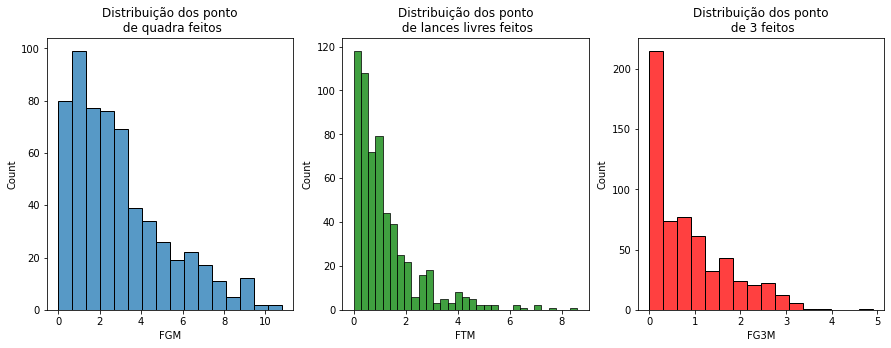

In [24]:
#Histogramas 
fig,axes=plt.subplots(1,3,figsize=[15,5]);
sb.histplot(ax=axes[0],x=nba_df['FGM']);
axes[0].set_title('Distribuição dos ponto\n de quadra feitos');
sb.histplot(ax=axes[1],x=nba_df['FTM'],color="green");
axes[1].set_title('Distribuição dos ponto\n de lances livres feitos')
sb.histplot(ax=axes[2],x=nba_df['FG3M'],color="red");
axes[2].set_title('Distribuição dos ponto\n de 3 feitos')

* Percebe-se, na figura azul acima que os pontos de quadra, tem-se uma frequência muito maior em sua cauda do que os outros tipos de pontos. Mas, isso já é o esperado, agora olhando para a ditribuição dos pontos de três na figura vermelha, temos uma ocorrência bem menor nos seus extremos, no qual tem-se apenas um valor com 5 cestas de três por jogo ( Esse jogador com esse outlier chama-se Stephen Curry ). Com isso, é possivel perceber uma diferença entre as distribuições dos pontos, vamos visualizar melhor em um boxplot abaixo: 

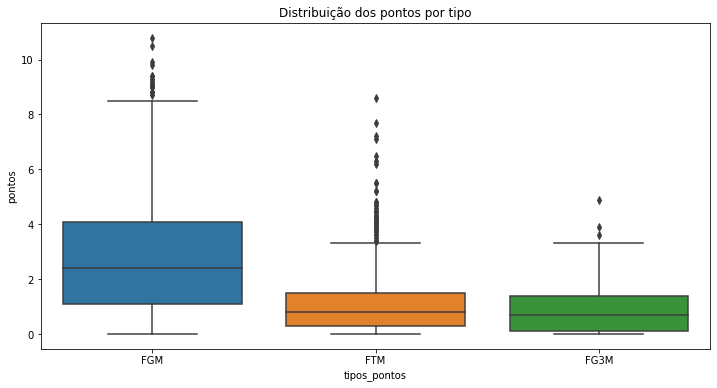

In [105]:
# Boxplot
fig,axes=plt.subplots(1,figsize=[12,6]);
sb.boxplot(x='tipos_pontos',y='pontos',data=pontos_df);
plt.title('Distribuição dos pontos por tipo');

* Observando o gráfico de boxplot acima, é possível notar as diferenças entre os tipos de pontos com maior precisão. Com a ideia do que foi observado anteriomente ( histogramas ), fica mais claro que os pontos de quadra se diferência de forma significativa das cestas de três. Isso já era de se esperar, pois as cestas de quadra são mais próximas do que as de três. Agora vamos verificar isso em um teste de hipóteses abaixo:

#### Testes de hipóteses  
1. Verificando a normalidade dos tipos de pontos com o teste de Shapiro-Wilk ;
2. A partir disso vamos saber qual teste utilizar.

In [110]:
# Teste de Shapiro-Wilk
from scipy import stats
stats.shapiro(nba_df['FGM'])

ShapiroResult(statistic=0.9170466065406799, pvalue=1.8368053390636087e-17)

In [111]:
stats.shapiro(nba_df['FTM'])

ShapiroResult(statistic=0.7895015478134155, pvalue=6.4593228996278964e-27)

In [112]:
stats.shapiro(nba_df['FG3M'])

ShapiroResult(statistic=0.8820990324020386, pvalue=8.945248274215648e-21)

* No teste de Shapiro-Wilk com as hipóteses Ho: variável é normalmente distribuida vs. H1: variável não é normalmente distribuida; 
* Foi obtido que nenhuma das variáveis possuem distribuição normal, todas obtiveram um valor-p < 0.001. Com isso, vamos utilizar um teste não paramétrico chamado de Kruskal - Wallis;
* O teste de Kruskal - Wallis tem as seguintes hipóteses Ho: As variáveis pertencem a mesma população vs. H1: As variáveis não pertencem a mesma população.

In [127]:
# Teste de Kruskal 
stats.kruskal(nba_df['FGM'],nba_df['FTM'],nba_df['FG3M'])

KruskalResult(statistic=377.0216135005771, pvalue=1.351440249463514e-82)

* Tendo o teste de Kruskal- Wallis acima, obtivemos um valor-p < 0.001. Com esse resultado,temos que a uma diferença significativa entre alguma das variáveis, no qual foi observado no gráfico de boxplot que os pontos de quadra são maiores do que os outros tipos. Poderiamos fazer um pós-teste, porém como foi observado nos gráficos acima, os pontos de quadra é o que se diferência dos outros tipos.

* No qual chegamos a conclusão, que os pontos de quadra ainda são os mais utilizados pelos os jogadores. Em estudos posteriores, vamos tentar verificar se  está havendo alguma evolução desses tipos de pontos em decorrer das temporadas.